In [41]:
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Loading in data 
adj =  np.genfromtxt('Inputs/adj.csv', delimiter=',', dtype=np.int8)
data = np.genfromtxt('Inputs/data.csv', delimiter=',')

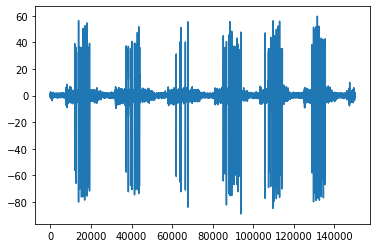

In [45]:
# Plotting the first channel 
plt.plot(data[:,1])
plt.show()

In [46]:
# Figuring out how to generate dummy data

# Sinusodal data
def gen_dummy_data():
    # TODO: Paramterize this so it can change size, perhaps function o_O
    return np.asarray([np.sin(np.arange(0,100,.1))]*16).transpose()
    
def gen_dummy_adj():
    # TODO: No clue, this is hard coded
    tmp = []
    for i in range(1,16,2):
        tmp.append([i-1, i])
        tmp.append([i, i-1])
    return np.asarray(tmp)


In [304]:
# Generating dummy data with unique spike templates 

# Generating spike times 
def gen_spike_times(numSpks, lim, numTemplates, numChans):
    """numSpks: # of spikes, lim: length of data, numTemplates: # of templates, numChans: # of channels"""
    spkTimes = []
    spkChans = []
    for i in range(numTemplates):
        spkTimes.append(np.random.choice(range(lim), numSpks, replace = False))
        spkChans.append(np.random.choice(range(numChans), numSpks, replace=True))
    return np.asarray(spkTimes), np.asarray(spkChans)

# Generating spike template
def gen_spike_templates(numSpks,muWidth=90,sigmaWidth=10, muFac=0.1, sigmaFac=0.02, muVert=25, sigmaVert=5):
    """
    numSpks: # of Spikes, muWidth: mean width of spike, sigmaWidth: stdev of spike width, muFac: mean width fator, 
    sigmaFac: stdev of spike factor, muVert: mean vertical scaling factor, sigmaVert: stdev of vertical scaling factor
    """
    from scipy import signal 
    
    waveforms = []
    
    for i in range(numSpks):
        width = sigmaWidth * np.random.randn() + muWidth 
        factor = (np.abs(sigmaFac*np.random.randn()+muFac))*width
        polarity = np.random.choice([1,-1], 1)[0]
        vertical = sigmaVert*np.random.randn()+muVert
        waveforms.append(polarity*vertical*signal.ricker(width, factor))
    return np.asarray(waveforms, dtype=object)

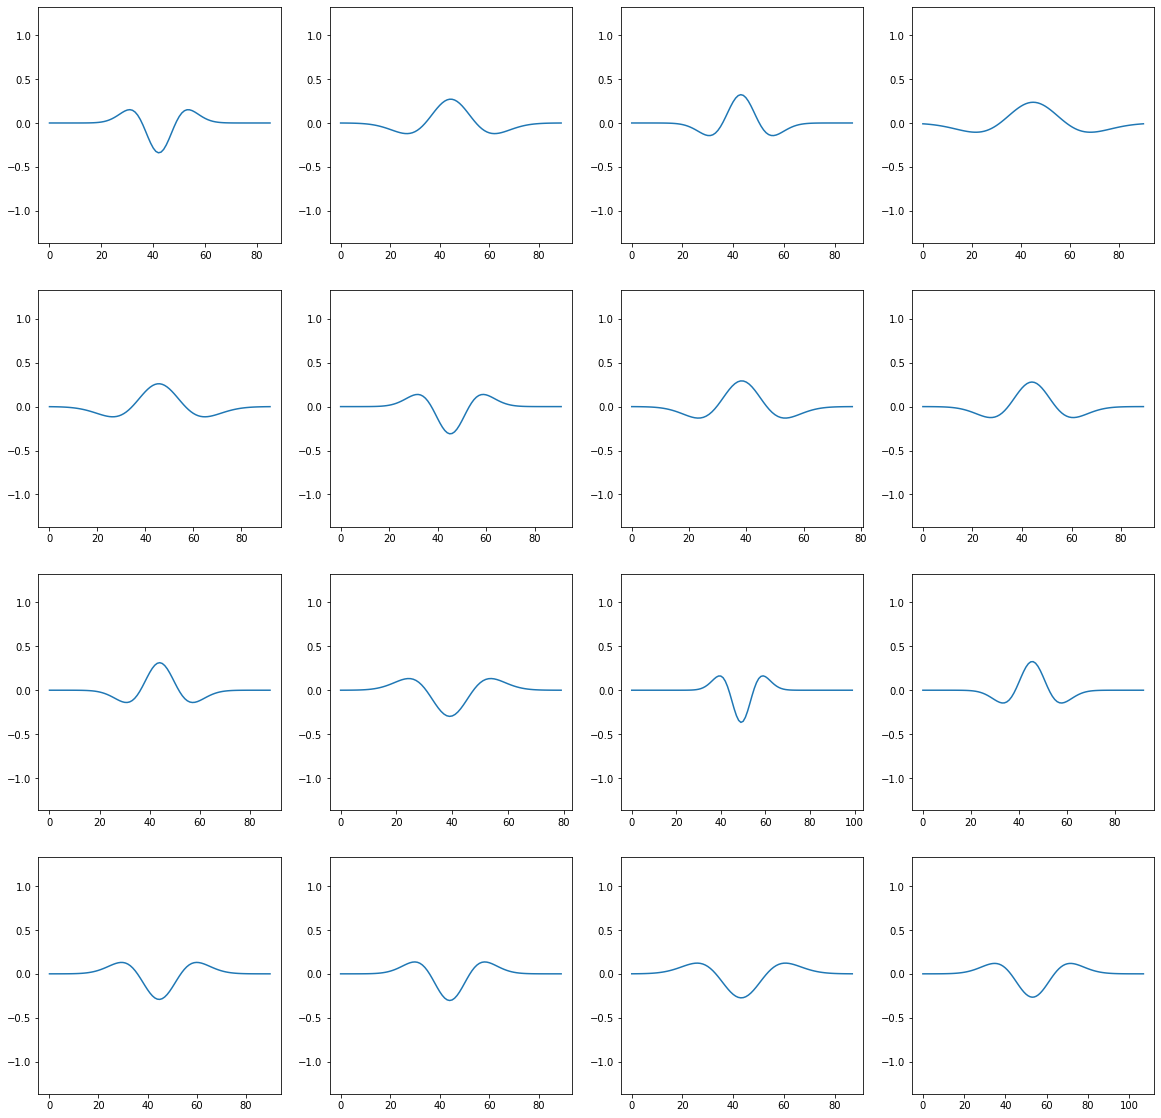

<function print>

In [302]:
# Plotting of waveforms 
def plot_waveforms(wave):
    fig, axs = plt.subplots(4,4)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    plt.grid=True
    
    # Loop variables 
    count, minY, maxY = 0, float('inf'), -float('inf') 
    
    for i in range(4):
        for j in range(4):
            axs[i][j].plot(wave[count])
            minY = min(min(wave[count]),minY)
            maxY = max(max(wave[count]),maxY)
            count += 1
    
    # Updating Y scale 
    for i in range(4):
        for j in range(4):
            axs[i][j].set_ylim((minY-1, maxY+1))
    
    plt.show()
    return fig, axs
plot_waveforms(waveforms)
print

([<matplotlib.lines.Line2D at 0x7f9b5decefa0>], (10, 10))

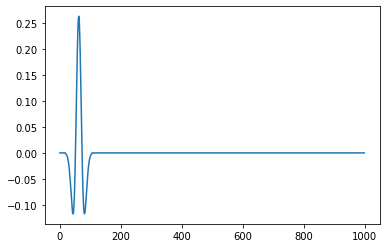

In [248]:
# Figured out how to insert into the data O: 
tmp = np.zeros((16, 1000))
a = times[0][0],bruh[0][0]
waveforms[0].shape[0] // 2
tmp[a[1]][a[0]-(waveforms[0].shape[0]//2):a[0]+(waveforms[0].shape[0]//2)+1] = waveforms[0]
plt.plot(tmp[a[1]]), wave

In [326]:
# Generating dummy data set with cool hats 
def generate_hat_data(numSpks, lim, numTemplates, numChans, muWidth=90, sigmaWidth=10, muFac=0.1, sigmaFac=0.02, muVert=25, sigmaVert=5, seed = False):
    if seed:
        np.random.seed(1738)
    
    times, chans = gen_spike_times(numSpks, lim, numTemplates, numChans)
    
    waveforms = gen_spike_templates(numTemplates, muWidth, sigmaWidth, muFac, sigmaFac, muVert, sigmaVert)
    
    # Generating zeros matrix 
    tmp = np.zeros((numChans, lim))
    spikes_inserted = []
    
    for i in range(numTemplates):
        for j in range(numSpks):
            wave = waveforms[i]
            spkTime = times[i][j]
            spkChan = chans[i][j]
            radius = wave.shape[0]//2
            if spkTime - radius > 0 and spkTime + radius + 1 < lim: 
                if wave.shape[0] % 2 == 0:
                    tmp[spkChan][spkTime-radius:spkTime+radius] += wave
                else:
                    tmp[spkChan][spkTime-radius:spkTime+radius+1] += wave
                
                spikes_inserted.append([i,spkTime,spkChan])
    return tmp, np.asarray(spikes_inserted)
            

def insert_spike():
    pass

dummy_data, dummy_spikes = generate_hat_data(10, 1000, 10, 16, seed=False)

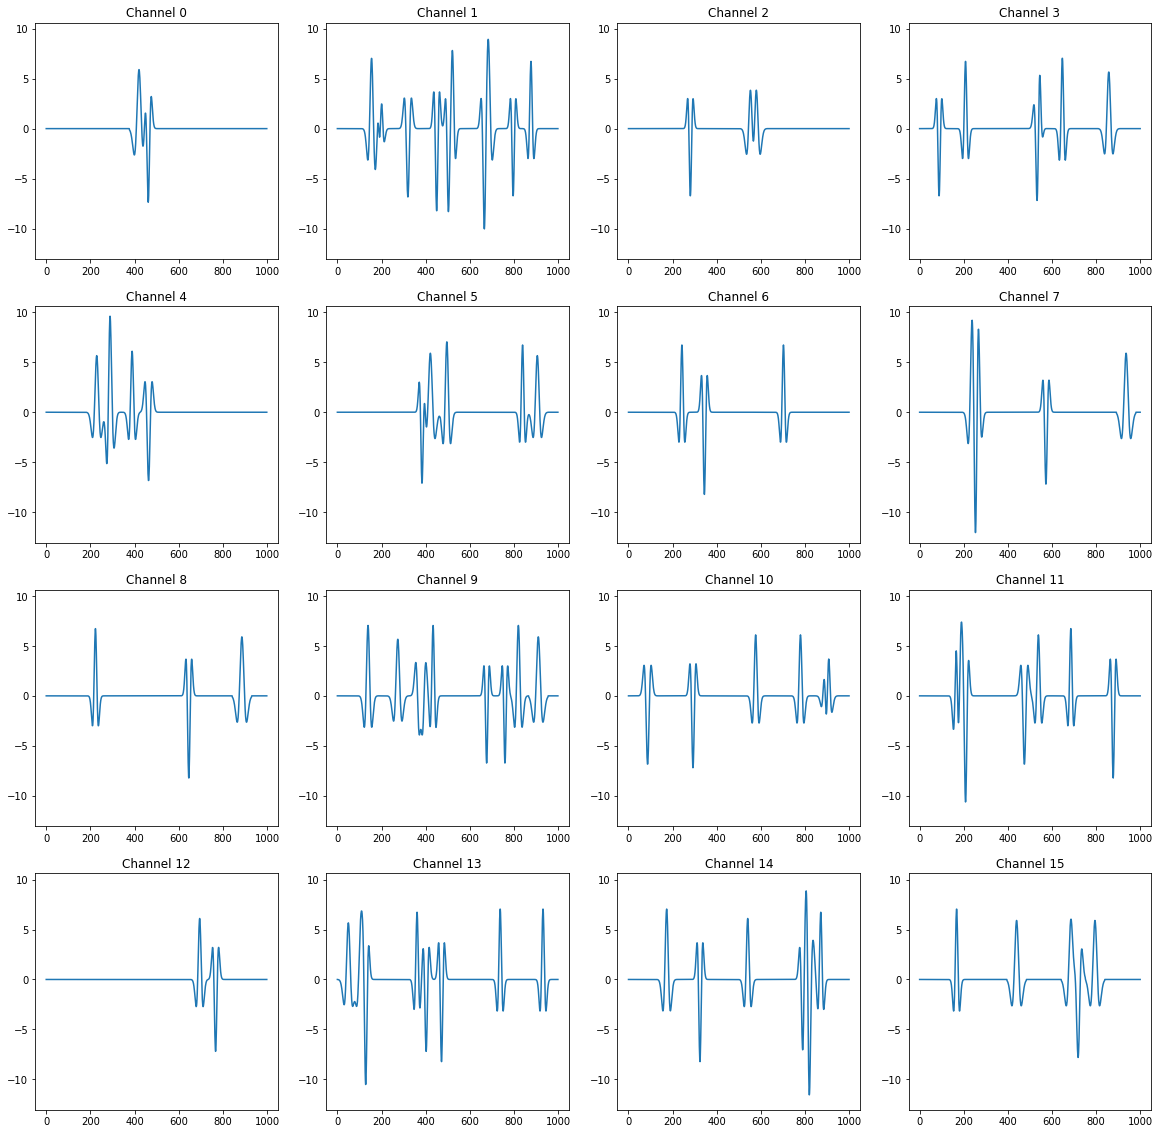

In [327]:
def plot_dummy_data(data):
    fig, axs = plt.subplots(4,4)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    plt.grid=True
    
    # Loop variables 
    count, minY, maxY = 0, float('inf'), -float('inf') 
    
    for i in range(4):
        for j in range(4):
            axs[i][j].plot(data[count])
            axs[i][j].set_title("Channel {}".format(count))
            minY = min(min(data[count]),minY)
            maxY = max(max(data[count]),maxY)
            count+= 1 
    
    # Updating Y scale 
    for i in range(4):
        for j in range(4):
            axs[i][j].set_ylim((minY-1, maxY+1))
    
    plt.show()
    return fig, axs
a,b = plot_dummy_data(dummy_data)

In [321]:
def count_spikes(spikes, waveforms):
    
    # Getting length of each waveform 
    lengths = [x.shape[0] for x in waveforms] 
    for spk in spikes:
        
    
count_spikes(dummy_spikes, waveforms)

[571 770 267 288 943 215 842 805  80 102 219 494 653 353 759 631 396 458
 291 218 751 664 668 394 157 491 571 622 352 445 306 848 378 122 295 143
 449 114 216 589 606 808 763 564 246 811 317 518 663 302 881 201 852 529
 600 420 582 688 592 404 723 205 525 500 308  62 939 574 405  60 354 110
 747 519 657 464 528 646 593 754 830 513 155 827 520  78 740 722 385 113
 130]
